# Getting data

In [1]:
import pandas as pd 
import os 
path = os.getcwd()

ratings_df = pd.read_csv(os.path.join(path,'ratings.csv'))

movies_df = pd.read_csv(os.path.join(path,'movies.csv'))

tmdb_df = pd.read_csv(os.path.join(path,'tmdb_data_combine.csv'))

links_df = pd.read_csv(os.path.join(path,'links.csv'))

links_df = links_df.dropna(axis=0)
links_df['tmdbId'] = links_df['tmdbId'].astype('int')
master_df = ratings_df.merge(links_df , how='left' , on='movieId')
master_df = master_df.dropna(axis=0)
master_df['imdbId'] = master_df['imdbId'].astype('int')
master_df['tmdbId'] = master_df['tmdbId'].astype('int')
master_df = master_df.merge(tmdb_df, how='left' , left_on='tmdbId' , right_on='id')
master_df = master_df.dropna(axis=0)
master_df = master_df.merge(movies_df[['movieId','title','genres']].copy() , how='left' , on='movieId')

In [2]:
master_df.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,overview,popularity,original_title,runtime,release_date,vote_average,vote_count,status,tagline,spoken_languages,cast,id,title,genres
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,1995-10-30,7.970,17277.0,Released,Hang on for the comedy that goes to infinity a...,en,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,113228,15602,A family wedding reignites the ancient feud be...,12.686,Grumpier Old Men,101.0,1995-12-22,6.494,350.0,Released,Still Yelling. Still Fighting. Still Ready for...,en,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,15602.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,113277,949,Obsessive master thief Neil McCauley leads a t...,58.478,Heat,170.0,1995-12-15,7.908,6620.0,Released,A Los Angeles crime saga.,en|es,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...,949.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,114369,807,Two homicide detectives are on a desperate hun...,60.472,Se7en,127.0,1995-09-22,8.369,19575.0,Released,Seven deadly sins. Seven ways to die.,en,Morgan Freeman|Brad Pitt|Gwyneth Paltrow|Andre...,807.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,114814,629,"Held in an L.A. interrogation room, Verbal Kin...",39.571,The Usual Suspects,106.0,1995-07-19,8.193,9684.0,Released,Five criminals. One line up. No coincidence.,es|en|fr|hu,Gabriel Byrne|Kevin Spacey|Stephen Baldwin|Kev...,629.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [3]:
len(master_df)

96014

## Find correlations

In [4]:
master_df.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,overview,popularity,original_title,runtime,release_date,vote_average,vote_count,status,tagline,spoken_languages,cast,id,title,genres
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,1995-10-30,7.970,17277.0,Released,Hang on for the comedy that goes to infinity a...,en,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,113228,15602,A family wedding reignites the ancient feud be...,12.686,Grumpier Old Men,101.0,1995-12-22,6.494,350.0,Released,Still Yelling. Still Fighting. Still Ready for...,en,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,15602.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,113277,949,Obsessive master thief Neil McCauley leads a t...,58.478,Heat,170.0,1995-12-15,7.908,6620.0,Released,A Los Angeles crime saga.,en|es,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...,949.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,114369,807,Two homicide detectives are on a desperate hun...,60.472,Se7en,127.0,1995-09-22,8.369,19575.0,Released,Seven deadly sins. Seven ways to die.,en,Morgan Freeman|Brad Pitt|Gwyneth Paltrow|Andre...,807.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,114814,629,"Held in an L.A. interrogation room, Verbal Kin...",39.571,The Usual Suspects,106.0,1995-07-19,8.193,9684.0,Released,Five criminals. One line up. No coincidence.,es|en|fr|hu,Gabriel Byrne|Kevin Spacey|Stephen Baldwin|Kev...,629.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [5]:
correl_df = master_df.groupby('movieId').agg({'rating':['mean'] , 
                                              'popularity' : ['first'] , 
                                              'runtime' : ['first'] , 
                                              'vote_average' : ['first']})

In [6]:
correl_df = correl_df.reset_index()
correl_df.columns = correl_df.columns.to_flat_index()

In [7]:
correl_df.columns = ['movieID' , 'rating_mean' , 'popularity' , 'runtime' , 'vote_average_tmdb']

In [8]:
correl_df[['rating_mean','popularity','runtime','vote_average_tmdb']].corr()

,rating_mean,popularity,runtime,vote_average_tmdb
rating_mean,1.000000,0.044431,0.185157,0.560654
popularity,0.044431,1.000000,0.187746,0.240303
runtime,0.185157,0.187746,1.000000,0.318813
vote_average_tmdb,0.560654,0.240303,0.318813,1.000000


In [9]:
master_df['genres'] = master_df['genres'].str.split("|")
master_df = master_df.explode(column='genres')

In [10]:
master_df.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,overview,popularity,original_title,runtime,release_date,vote_average,vote_count,status,tagline,spoken_languages,cast,id,title,genres
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,1995-10-30,7.97,17277.0,Released,Hang on for the comedy that goes to infinity a...,en,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862.0,Toy Story (1995),Adventure
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,1995-10-30,7.97,17277.0,Released,Hang on for the comedy that goes to infinity a...,en,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862.0,Toy Story (1995),Animation
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,1995-10-30,7.97,17277.0,Released,Hang on for the comedy that goes to infinity a...,en,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862.0,Toy Story (1995),Children
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,1995-10-30,7.97,17277.0,Released,Hang on for the comedy that goes to infinity a...,en,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862.0,Toy Story (1995),Comedy
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,1995-10-30,7.97,17277.0,Released,Hang on for the comedy that goes to infinity a...,en,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862.0,Toy Story (1995),Fantasy


In [11]:
rating_by_genre = master_df.groupby(['genres'])['rating'].mean()

In [12]:
rating_by_genre

genres
(no genres listed)    3.134615
Action                3.448681
Adventure             3.507715
Animation             3.598830
Children              3.401477
Comedy                3.379551
Crime                 3.657730
Documentary           3.801027
Drama                 3.656321
Fantasy               3.484229
Film-Noir             3.921965
Horror                3.261155
IMAX                  3.618501
Musical               3.569304
Mystery               3.629965
Romance               3.507457
Sci-Fi                3.451834
Thriller              3.496999
War                   3.808779
Western               3.587264
Name: rating, dtype: float64

<BarContainer object of 20 artists>

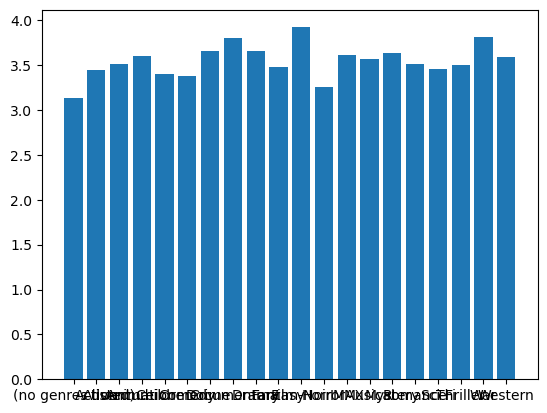

In [13]:
import matplotlib.pyplot as plt 
plt.bar(x = rating_by_genre.index , height=rating_by_genre.values)

In [14]:
df_encoded = pd.get_dummies(master_df, columns=['genres'] , dtype=float)

In [15]:
df_encoded.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,overview,popularity,original_title,runtime,...,genres_Film-Noir,genres_Horror,genres_IMAX,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_encoded.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'imdbId', 'tmdbId',
       'overview', 'popularity', 'original_title', 'runtime', 'release_date',
       'vote_average', 'vote_count', 'status', 'tagline', 'spoken_languages',
       'cast', 'id', 'title', 'genres_(no genres listed)', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Children',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Fantasy', 'genres_Film-Noir', 'genres_Horror', 'genres_IMAX',
       'genres_Musical', 'genres_Mystery', 'genres_Romance', 'genres_Sci-Fi',
       'genres_Thriller', 'genres_War', 'genres_Western'],
      dtype='object')

In [17]:
df_encoded = df_encoded.groupby(['userId', 'movieId', 'rating', 'timestamp', 'imdbId', 'tmdbId',
       'overview', 'popularity', 'original_title', 'runtime', 'release_date',
       'vote_average', 'vote_count', 'status', 'tagline', 'spoken_languages',
       'cast', 'id', 'title'])[['genres_(no genres listed)', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Children',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Fantasy', 'genres_Film-Noir', 'genres_Horror', 'genres_IMAX',
       'genres_Musical', 'genres_Mystery', 'genres_Romance', 'genres_Sci-Fi',
       'genres_Thriller', 'genres_War', 'genres_Western']].sum().reset_index()

In [18]:
df_encoded.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,overview,popularity,original_title,runtime,...,genres_Film-Noir,genres_Horror,genres_IMAX,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",100.954,Toy Story,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,113228,15602,A family wedding reignites the ancient feud be...,12.686,Grumpier Old Men,101.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,113277,949,Obsessive master thief Neil McCauley leads a t...,58.478,Heat,170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,47,5.0,964983815,114369,807,Two homicide detectives are on a desperate hun...,60.472,Se7en,127.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,50,5.0,964982931,114814,629,"Held in an L.A. interrogation room, Verbal Kin...",39.571,The Usual Suspects,106.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
len(df_encoded)

96014

# Splitting the data 

In [20]:
train_data=df_encoded.iloc[:int(df_encoded.shape[0]*0.80)]
test_data=df_encoded.iloc[int(df_encoded.shape[0]*0.80):]

In [21]:
len(train_data)

76811

In [22]:
len(test_data)

19203

In [9]:
train_data.shape 

(76811, 20)

In [10]:
test_data.shape

(19203, 20)

# XGBoost 

In [23]:
import xgboost as xgb

In [24]:
xgb_model = xgb.XGBRegressor(n_jobs=13, random_state=15, n_estimators=100)
xgb_model.fit(train_data[['popularity', 'runtime', 
       'vote_average', 'genres_(no genres listed)', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Children',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Fantasy', 'genres_Film-Noir', 'genres_Horror', 'genres_IMAX',
       'genres_Musical', 'genres_Mystery', 'genres_Romance', 'genres_Sci-Fi',
       'genres_Thriller', 'genres_War', 'genres_Western']].copy() , train_data[['rating']])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=13,
             num_parallel_tree=None, random_state=15, ...)

In [25]:
import numpy as np 
y_pred = xgb_model.predict(test_data[['popularity', 'runtime', 
       'vote_average', 'genres_(no genres listed)', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Children',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Fantasy', 'genres_Film-Noir', 'genres_Horror', 'genres_IMAX',
       'genres_Musical', 'genres_Mystery', 'genres_Romance', 'genres_Sci-Fi',
       'genres_Thriller', 'genres_War', 'genres_Western']].copy())

from sklearn.metrics import mean_squared_error
print("MSE : {}".format(mean_squared_error(np.array(test_data['rating']) , y_pred)))

MSE : 0.9228120571901933


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[08:50:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1703076401032/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


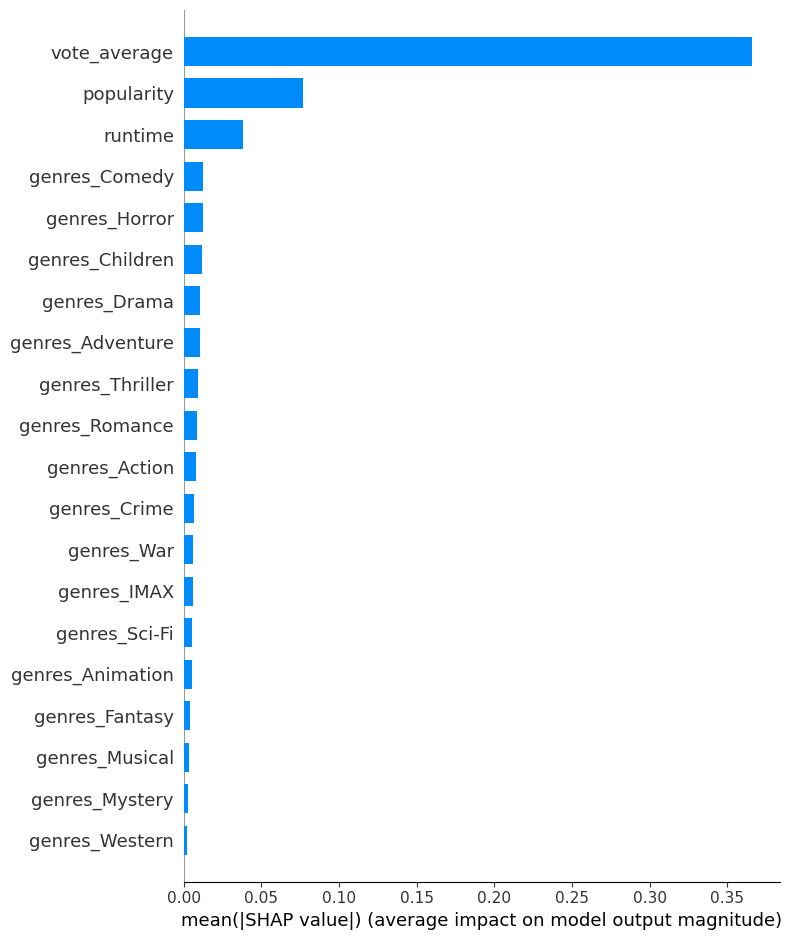

In [26]:
import shap 
x_test = test_data[['popularity', 'runtime', 
       'vote_average', 'genres_(no genres listed)', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Children',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Fantasy', 'genres_Film-Noir', 'genres_Horror', 'genres_IMAX',
       'genres_Musical', 'genres_Mystery', 'genres_Romance', 'genres_Sci-Fi',
       'genres_Thriller', 'genres_War', 'genres_Western']].copy()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")